**#TESTING DATASET EXPOLARTORY DATA ANALYSIS**

In [122]:
import json

In [123]:
with open('/home/shashank/IEEE/train/train.json') as f:
    df = json.load(f)

In [124]:
df['images']

[{'height': 512,
  'width': 512,
  'id': 1,
  'file_name': 'image/urban_0183_1_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 2,
  'file_name': 'image/rural_0222_1_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 3,
  'file_name': 'image/suburban_0177_1_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 4,
  'file_name': 'image/suburban_0307_0_1.jpg'},
 {'height': 500, 'width': 500, 'id': 5, 'file_name': 'image/CBD_0052_1_1.jpg'},
 {'height': 512,
  'width': 512,
  'id': 6,
  'file_name': 'image/rural_0296_0_1.jpg'},
 {'height': 512,
  'width': 512,
  'id': 7,
  'file_name': 'image/suburban_0217_0_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 8,
  'file_name': 'image/suburban_0274_0_1.jpg'},
 {'height': 512,
  'width': 512,
  'id': 9,
  'file_name': 'image/rural_0324_1_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 10,
  'file_name': 'image/suburban_0284_0_0.jpg'},
 {'height': 512,
  'width': 512,
  'id': 11,
  'file_name': 'image/rural_0150_1_1.jpg'},
 {'height': 512,
  'wid

In [125]:
df['categories']

[{'id': 0, 'name': 'building', 'supercategory': 'building'}]

In [126]:
df['annotations']

[{'iscrowd': 0,
  'image_id': 1,
  'bbox': [390, 466, 73, 46],
  'segmentation': [[435, 465, 463, 506, 456, 511, 402, 511, 390, 494]],
  'category_id': 0,
  'id': 1,
  'area': 2016},
 {'iscrowd': 0,
  'image_id': 1,
  'bbox': [440, 432, 64, 73],
  'segmentation': [[504,
    464,
    486,
    477,
    493,
    490,
    467,
    505,
    440,
    462,
    484,
    432]],
  'category_id': 0,
  'id': 2,
  'area': 2475},
 {'iscrowd': 0,
  'image_id': 1,
  'bbox': [361, 416, 67, 63],
  'segmentation': [[409,
    471,
    400,
    463,
    378,
    479,
    363,
    454,
    361,
    442,
    403,
    415,
    427,
    454]],
  'category_id': 0,
  'id': 3,
  'area': 2370},
 {'iscrowd': 0,
  'image_id': 1,
  'bbox': [504, 410, 8, 18],
  'segmentation': [[504, 415, 512, 409, 512, 427]],
  'category_id': 0,
  'id': 4,
  'area': 67},
 {'iscrowd': 0,
  'image_id': 1,
  'bbox': [403, 381, 81, 68],
  'segmentation': [[458,
    381,
    484,
    421,
    457,
    441,
    451,
    433,
    424,
    4

In [127]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img = np.array(Image.open("/home/shashank/IEEE/train/"+df['images'][0]['file_name']))

In [128]:
img.shape

(512, 512, 3)

In [129]:
segmentations = np.array(df['annotations'][0]['segmentation'])
segmentations[0].shape[0]

10

In [130]:

segmentations = segmentations.reshape(((segmentations[0].shape[0])//2, 2))

In [131]:
segmentations

array([[435, 465],
       [463, 506],
       [456, 511],
       [402, 511],
       [390, 494]])

In [132]:
bbox = df['annotations'][0]['bbox']

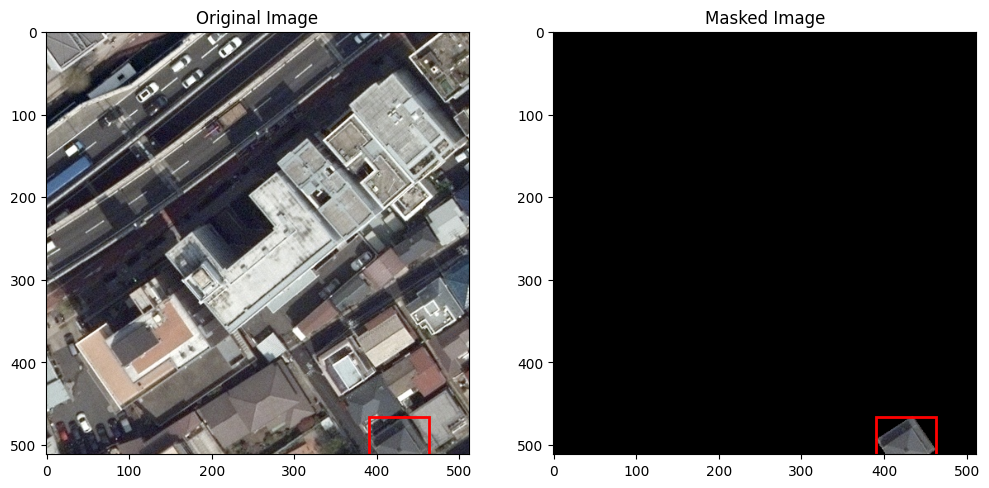

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.path as mplPath
import matplotlib.patches as patches

def apply_segmentation_mask(img, segmentation_mask, bbox):
    """
    Apply a segmentation mask to an image and plot the original and masked images.

    Parameters:
    img (PIL.Image or np.ndarray): The input image.
    segmentation_mask (np.ndarray): An array of shape (N, 2) containing the polygon vertices.

    Returns:
    None
    """
    # Convert image to numpy array if it is a PIL Image
    if isinstance(img, Image.Image):
        img_array = np.array(img)
    else:
        img_array = img

    # Step 2: Create a mask of the same size as the image
    mask = np.zeros(img_array.shape[:2], dtype=np.uint8)

    # Step 3: Create a path from the segmentation mask
    path = mplPath.Path(segmentation_mask)

    # Step 4: Apply the mask by checking each point inside the polygon
    for i in range(img_array.shape[0]):
        for j in range(img_array.shape[1]):
            if path.contains_point((j, i)):
                mask[i, j] = 1

    # Step 5: Apply the mask to the image
    masked_img = img_array.copy()
    masked_img[mask == 0] = 0

    # Display the original image and the masked image
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(img_array)
    ax[0].set_title('Original Image')

        # Draw bounding box on original image
    rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax[0].add_patch(rect)

    ax[1].imshow(masked_img)
    ax[1].set_title('Masked Image')

    # Draw bounding box on masked image
    rect_masked = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none')
    ax[1].add_patch(rect_masked)

    plt.show()

apply_segmentation_mask(img, segmentations, bbox)

In [134]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import random
import os
import cv2

### For visualizing the outputs ###
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline

loading annotations into memory...
Done (t=0.15s)
creating index...
index created!
101
{'height': 512, 'width': 512, 'id': 101, 'file_name': 'image/urban_0205_0_0.jpg'}
(512, 512, 3)
28


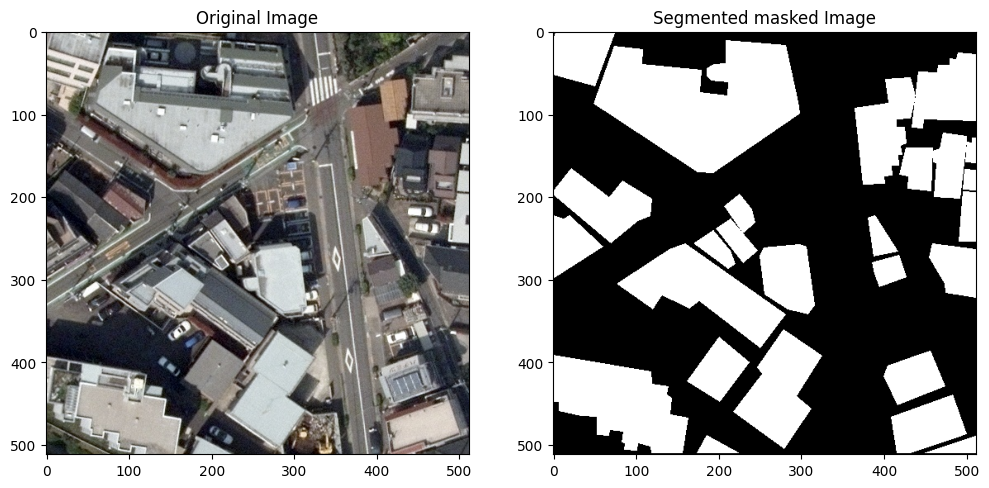

In [135]:
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
from pycocotools import mask as maskUtils
import skimage.io as io
import os

# Path to your COCO annotations file and images directory
annotation_file = '/home/shashank/IEEE/val/val.json'
image_directory = '/home/shashank/IEEE/val//'

# Initialize the COCO API for instance annotations
coco = COCO(annotation_file)

# Get all image IDs
image_ids = coco.getImgIds()

# Select an image ID (for example, the first one)
image_id = image_ids[100]
print(image_id)
# Load the image information
image_info = coco.loadImgs(image_id)[0]
print(image_info)
image_path = os.path.join(image_directory, image_info['file_name'])

# Load the image
image = io.imread(image_path)
print(image.shape)
# Load the annotations for the selected image
annotation_ids = coco.getAnnIds(imgIds=image_info['id'])
annotations = coco.loadAnns(annotation_ids)
print(len(annotations))

# Create a mask for the annotations
mask = np.zeros((image_info['height'], image_info['width']))

for annotation in annotations:
    # Get the segmentation polygons
    segmentation = annotation['segmentation']
    
    # If the segmentation is a list of polygons
    if isinstance(segmentation, list):
        rles = maskUtils.frPyObjects(segmentation, image_info['height'], image_info['width'])
        rle = maskUtils.merge(rles)
        mask += maskUtils.decode(rle)
    # If the segmentation is a RLE
    else:
        mask = maskUtils.merge([mask, maskUtils.decode(maskUtils.frPyObjects(segmentation, image_info['height'], image_info['width']))])

mask[mask > 1] = 0
# Plot the mask
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(image)
ax[0].set_title('Original Image')

ax[1].imshow(mask, alpha=1.0, cmap='grey')
ax[1].set_title('Segmented masked Image')

plt.show()


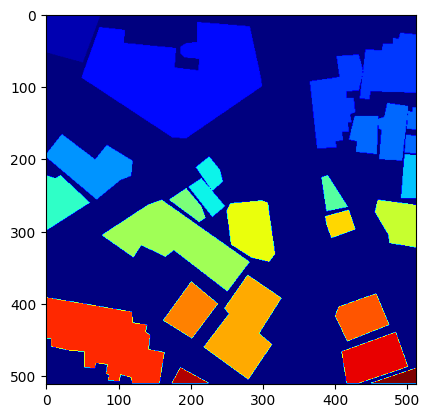

In [136]:
from skimage.measure import label, regionprops
binary_mask = mask
labeled_mask = label(binary_mask)
plt.imshow(labeled_mask,  cmap = 'jet')

In [137]:
import os
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt

def tile_mask(mask, d):
    # Create the output directory if it doesn't exist
    if not os.path.exists(dir_out):
        os.makedirs(dir_out)
    
    # name, ext = os.path.splitext(filename)
    # img = Image.open(os.path.join(dir_in, filename))
    img = Image.fromarray(mask.astype('uint8'))
    # plt.imshow(img)
    # print(img.size)
    if img.size[0] == 500:
        # Padding with 6 pixels around the image
        padding = 6
        padded_width = img.size[0] + 2 * padding
        padded_height = img.size[1] + 2 * padding
        
        # Create a new image with padding
        result = Image.new(img.mode, (padded_width, padded_height), 0) 
        result.paste(img, (padding, padding))
    else:
        result = img
    
    w, h = result.size
    # fig, ax = plt.subplots(4, 4, figsize=(12, 6))
    array = []
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        # out = os.path.join(dir_out, f'{name}_{i}_{j}.png')
        tile = result.crop(box)
        # tile.save(out)
        array.append(np.array(tile))
        # ax[i//128, j//128].imshow(tile)
    return array

array = tile_mask(mask, 128)
print(array[0].shape)

(128, 128)


**#End of exploratory data analysis**

**#START OF UNET MODEL**

In [186]:
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
import model
class_names = ['background', 'building']
select_classes = ['background', 'building']
class_rgb_values = [[0], [1]]
# Get RGB values of required classes
select_class_indices = [class_names.index(cls.lower()) for cls in select_classes]
select_class_rgb_values =  np.array(class_rgb_values)[select_class_indices]

print('Selected classes and their corresponding RGB values in labels:')
print('Class Names: ', class_names)
print('Class RGB values: ', class_rgb_values)

unet = model.segmentation_unet()
unet.load_state_dict(torch.load('./best_unet_model.pth'))

Selected classes and their corresponding RGB values in labels:
Class Names:  ['background', 'building']
Class RGB values:  [[0], [1]]


<All keys matched successfully>

**#UNET ENDS**

**#General Tests of model**

In [191]:
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    # print(label.shape)
    # print(label_values)
    for colour in label_values:
        # print(colour)
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
    semantic_map = np.stack(semantic_map, axis=-1)

    return semantic_map

def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values : values assignes to each position in one hot encoded vector

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

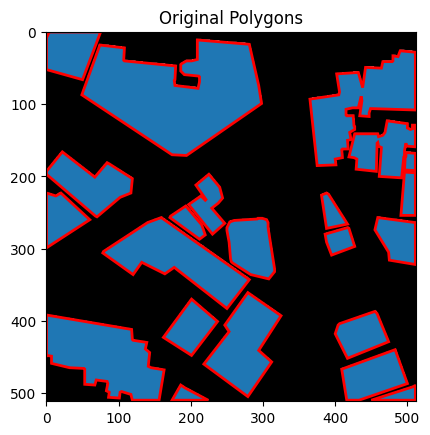

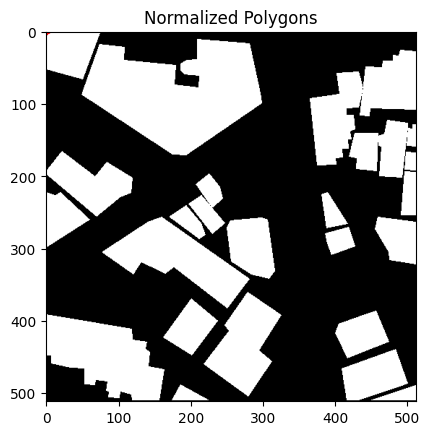

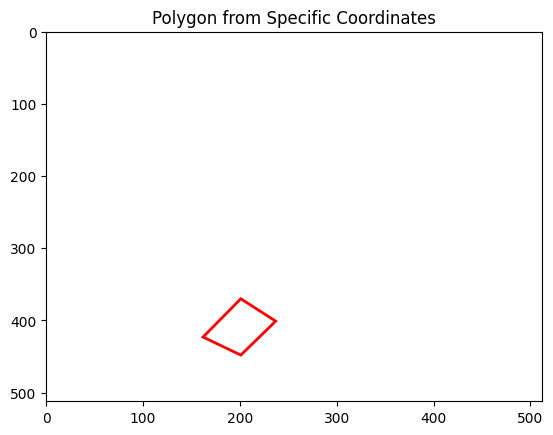

In [192]:
import numpy as np
import cv2
from shapely.geometry import Polygon

def mask_to_polygons(mask):
    '''
    Convierte una máscara de imagen en polígonos. Devuelve dos listas:
    - Lista de polígonos de shapely sin normalizar
    - Lista de polígonos de shapely normalizados (coordenadas entre 0 y 1)

    Args:
        img_path (str): Ruta al archivo de imagen original.
        mask_path (str): Ruta al archivo de la máscara en escala de grises.
    '''
    
    # mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    # Calcula los contornos 
    mask = mask.astype(bool)
    #contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours, _ = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # convertimos los contornos a polígonos de Label Studio
    polygons = []
    normalized_polygons = []
    for contour in contours:
        
        # Lo meto en un try porque la extraccion de polígonos que hace el opencv a partir de la máscara
        # a veces genera polígonos de menos de 4 vértices, que no tiene sentido por no ser cerrados, 
        # provocando que falle al convertir a polígno de shapely

        try:
            polygon = contour.reshape(-1, 2).tolist()
          
            # normalizamos las coordenadas entre 0 y 1 porque así lo requiere YOLOv8
            normalized_polygon = [[round(coord[0] / mask.shape[1] , 4), round(coord[1] / mask.shape[0] , 4)] for coord in polygon]
        
            # Convertimos a objeto poligono de shapely (sin normalizar)
            polygon_shapely = Polygon(polygon)
            simplified_polygon = polygon_shapely.simplify(0.85, preserve_topology=True)
            polygons.append(simplified_polygon)

            # normalizdos
            normalized_polygons.append(Polygon(normalized_polygon))
          

        except Exception as e:
            pass
        

    return polygons, normalized_polygons
polygons, normalised_polygons = mask_to_polygons(mask = mask)

def plot_polygons(polygons, title):
    fig, ax = plt.subplots()
    ax.imshow(mask, cmap='gray')
    coordinates = []
    for polygon in polygons:
        if polygon.is_empty:
            continue
        exterior_coords = np.array(polygon.exterior.coords)
        coordinates.append((exterior_coords))
        patch = plt.Polygon(exterior_coords, closed=True, fill='red', edgecolor='red', linewidth=2)
        ax.add_patch(patch)
    
    ax.set_title(title)
    plt.show()
    return coordinates

# Plot the original polygons
coordinates = plot_polygons(polygons, "Original Polygons")

# Plot the normalized polygons
coordinates_normalised = plot_polygons(normalised_polygons, "Normalized Polygons")


coordinates[0]

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Polygon as pltPolygon

# Given coordinates
coords = coordinates[5]

# Create a plot
fig, ax = plt.subplots()

# Optionally, you can set the limits if you have a specific size to fit the polygon within
ax.set_xlim(0, 512)
ax.set_ylim(0, 512)

# Add the polygon to the plot
polygon = pltPolygon(coords, closed=True, fill=None, edgecolor='red', linewidth=2)
ax.add_patch(polygon)

# Invert y-axis to match typical image coordinates where (0,0) is at the top-left
ax.invert_yaxis()

# Set title and show plot
ax.set_title("Polygon from Specific Coordinates")
plt.show()

In [193]:
def plot(coordintes, img):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)
    
    # Plot each set of coordinates as a polygon
    for coordi in coordinates:
        polygon = pltPolygon(coordi, closed=True, fill=None, edgecolor='red', linewidth=2)
        ax.add_patch(polygon)
    
    # Optionally, you can set the limits if you have a specific size to fit the polygons within
    ax.set_xlim(0, img.width)
    ax.set_ylim(0, img.height)
    
    # Invert y-axis to match typical image coordinates where (0,0) is at the top-left
    ax.invert_yaxis()
    
    # Set title and show plot
    ax.set_title("Polygons from Specific Coordinates")
    plt.show()

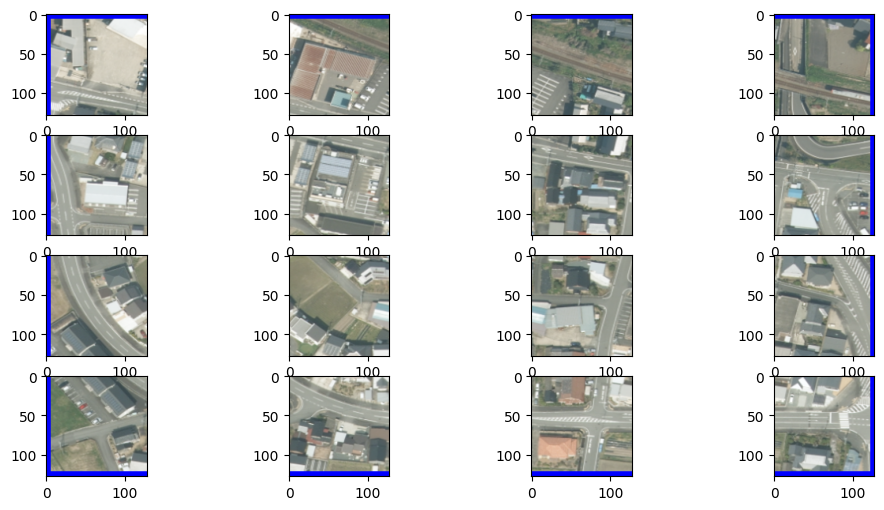

In [194]:
import os
from PIL import Image
from itertools import product
import matplotlib.pyplot as plt

def tile(filename, dir_in, dir_out, d):
    # Create the output directory if it doesn't exist
    if not os.path.exists(dir_out):
        os.makedirs(dir_out)
    
    name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    
    # Padding with 6 pixels around the image
    padding = 6
    padded_width = img.size[0] + 2 * padding
    padded_height = img.size[1] + 2 * padding
    
    # Create a new image with padding
    result = Image.new(img.mode, (padded_width, padded_height), (0, 0, 255)) 
    result.paste(img, (padding, padding))
    
    w, h = result.size
    fig, ax = plt.subplots(4, 4, figsize=(12, 6))
    
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        out = os.path.join(dir_out, f'{name}_{i}_{j}.png')
        tile = result.crop(box)
        tile.save(out)
        
        ax[i//128, j//128].imshow(tile)

filename = '0001.tif'
dir_in = './test/image/'
dir_out = './test/tiled_image/0001/'
tile(filename, dir_in, dir_out, 128)


In [195]:
def tile_mask(filename, dir_in, d):
    # Create the output directory if it doesn't exist
    if not os.path.exists(dir_out):
        os.makedirs(dir_out)
    
    # name, ext = os.path.splitext(filename)
    img = Image.open(os.path.join(dir_in, filename))
    # img = Image.fromarray(img.astype('uint8'))
    # plt.imshow(img)
    # print(img.size)
    if img.size[0] == 500:
        # Padding with 6 pixels around the image
        padding = 6
        padded_width = img.size[0] + 2 * padding
        padded_height = img.size[1] + 2 * padding
        
        # Create a new image with padding
        result = Image.new(img.mode, (padded_width, padded_height), 0) 
        result.paste(img, (padding, padding))
    else:
        result = img
    
    w, h = result.size
    # fig, ax = plt.subplots(4, 4, figsize=(12, 6))
    array = []
    grid = product(range(0, h-h%d, d), range(0, w-w%d, d))
    for i, j in grid:
        box = (j, i, j+d, i+d)
        # out = os.path.join(dir_out, f'{name}_{i}_{j}.png')
        tile = result.crop(box)
        # tile.save(out)
        array.append((i, j, np.array(tile)))
        # ax[i//128, j//128].imshow(tile)
    return array
filename = '0001.tif'
dir_in = './test/image/'
dir_out = './test/tiled_image/0001/'
array = tile_mask(filename, dir_in, 128)

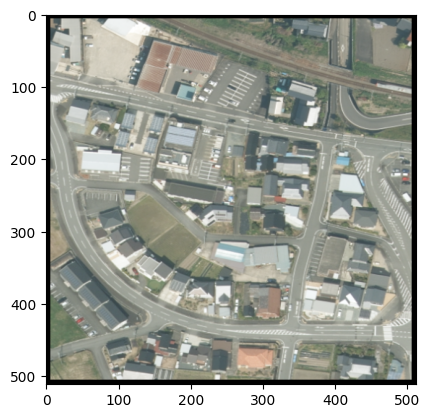

In [196]:
def join_tiles_np(tiles, w, h, d):
    # Create an empty array with the dimensions of the original padded image
    result_array = np.zeros((h, w), dtype=tiles[0][2].dtype)
    
    # Iterate through the tiles and place them in the correct position
    for i, j, tile in tiles:
        result_array[i:i+d, j:j+d] = tile
    
    return result_array

w = 512
h = 512
img = join_tiles(array, w, h, d = 128)
plt.imshow(img)

In [200]:
from tqdm import tqdm
import pandas as pd
import albumentations as A
from albumentations.pytorch import ToTensorV2

base_path = "./test/image/"
pred = []
submission = pd.DataFrame()
ID = []
seg_masks = []

transform = A.Compose([
    ToTensorV2()
])

unet.eval()
for step, files in enumerate(tqdm(os.listdir(base_path))):
    img_path = os.path.join(base_path, files)
    name = files.split('.')[0]
    array = tile_mask(files, base_path, 128)
    
    # img = Image.open(img_path)
    # fig, ax = plt.subplots(4, 4, figsize=(12, 6))
    output_masks = []
    for i, j, patches in array:
        img_array = np.array(patches).astype('float32')
        
        img_array = transform(image = img_array)['image'].unsqueeze(0)
        # plt.imshow(img_array[0].permute(1,2,0).cpu().detach().numpy().astype('uint8'))
        op = unet(img_array)
        mask_1 = reverse_one_hot((torch.sigmoid(op[0])).float().permute(1,2,0).cpu().detach().numpy())
        # ax[i//128, j//128].imshow(mask_1)
        # break
        output_masks.append((i, j, mask_1))
    img = join_tiles_np(output_masks, w, h, d = 128)
    
    labeled_mask = label(img)
    polygons, _ = mask_to_polygons(mask = labeled_mask)
    
    # def plot_polygons(mask, polygons):
    #     coordinates = []
    #     for polygon in polygons:
    #         if polygon.is_empty:
    #             continue
    #         exterior_coords = np.array(polygon.exterior.coords).astype('uint8')
    #         coordinates.append((exterior_coords))
    #     return coordinates
    def plot_polygons(polygons, title):
        # fig, ax = plt.subplots()
        # ax.imshow(img, cmap='gray')
        coordinates = []
        for polygon in polygons:
            if polygon.is_empty:
                continue
            exterior_coords = np.array(polygon.exterior.coords)
            coordinates.append((exterior_coords))
            # patch = plt.Polygon(exterior_coords, closed=True, fill=None, edgecolor='red', linewidth=2)
            # ax.add_patch(patch)
        
        # ax.set_title(title)
        # plt.show()
        return coordinates
    
    coordinates = plot_polygons(polygons, title = 'Image')
    # plot(coordinates, img)
    outputs = [list(map(tuple, coordinate)) for coordinate in coordinates]
    ID.append(name)
    seg_masks.append(str(outputs))
    # if step == 5:
    # break



submission['ImageID'] = ID
submission['Coordinates'] = seg_masks
submission.to_csv('submission.csv', index = False)

100%|██████████| 1000/1000 [34:22<00:00,  2.06s/it]


In [201]:
df = pd.read_csv('./submission.csv')
df.head()

ImageID                                        Coordinates
0      588  [[(125.0, 349.0), (121.0, 354.0), (126.0, 359....
1      621  [[(298.0, 497.0), (299.0, 498.0), (301.0, 497....
2      320  [[(327.0, 451.0), (318.0, 456.0), (317.0, 458....
3      505  [[(258.0, 496.0), (256.0, 499.0), (258.0, 502....
4      608  [[(130.0, 491.0), (129.0, 496.0), (130.0, 500....

In [179]:
import ast
coordi = ast.literal_eval(df['Coordinates'][0])
# coordi[0]

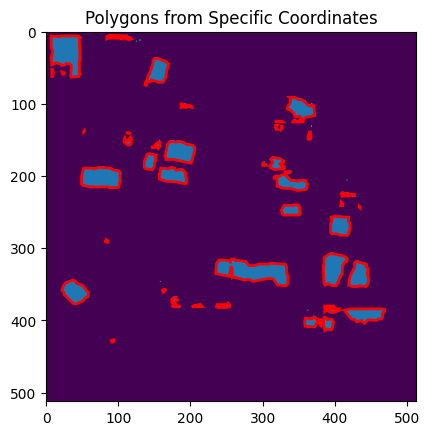

In [180]:
fig, ax = plt.subplots()

# Display the image
ax.imshow(img)

# Plot each set of coordinates as a polygon
for coordi in coordinates:
    polygon = pltPolygon(coordi, closed=True, fill='greu', edgecolor='red', linewidth=2)
    ax.add_patch(polygon)

# Optionally, you can set the limits if you have a specific size to fit the polygons within
ax.set_xlim(0, img.shape[0])
ax.set_ylim(0, img.shape[0])

# Invert y-axis to match typical image coordinates where (0,0) is at the top-left
ax.invert_yaxis()

# Set title and show plot
ax.set_title("Polygons from Specific Coordinates")
plt.show()

In [103]:
img = Image.open(f'./test/image/0588.tif')

588


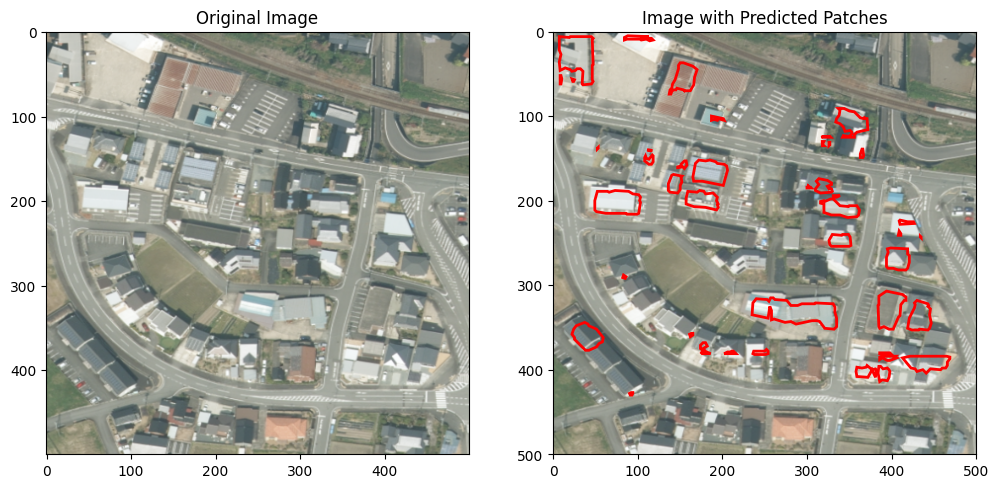

In [184]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon as pltPolygon
import ast
from PIL import Image

# Load the DataFrame
df = pd.read_csv('submission.csv')  # Update with your file path

def plot(coordin, img):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Display the original image
    ax[0].imshow(img)
    ax[0].set_title("Original Image")
    
    # Display the image with predicted patches
    ax[1].imshow(img)
    
    # Plot each set of coordinates as a polygon
    for coordi in coordin:
        polygon = pltPolygon(coordi, closed=True, fill=None, edgecolor='red', linewidth=2)
        ax[1].add_patch(polygon)
    
    # Optionally, you can set the limits if you have a specific size to fit the polygons within
    ax[1].set_xlim(0, img.width)
    ax[1].set_ylim(0, img.height)
    
    # Invert y-axis to match typical image coordinates where (0,0) is at the top-left
    # ax[0].invert_yaxis()
    ax[1].invert_yaxis()
    
    # Set title for the second plot and show the entire figure
    ax[1].set_title("Image with Predicted Patches")
    plt.show()

images = df['ImageID']
coordinates = df['Coordinates']

for step, (ids, coord) in enumerate(zip(images, coordinates)):
    print(ids)
    img = Image.open(f'./test/image/0001.tif')
    coordi = ast.literal_eval(coord)
    plot(coordi, img)
    # if step == 10:
    break


In [31]:
df = pd.read_csv('./submission.csv')
df.head()

ImageID                                        Coordinates
0      588  [[(54.0, 491.0), (51.0, 493.0), (51.0, 495.0),...
1      621  [[(156.0, 499.0), (157.0, 500.0), (156.0, 504....
2      320  [[(131.0, 489.0), (117.0, 496.0), (114.0, 499....
3      505  [[(57.0, 487.0), (54.0, 491.0), (54.0, 494.0),...
4      608  [[(143.0, 470.0), (144.0, 471.0), (142.0, 472....

588


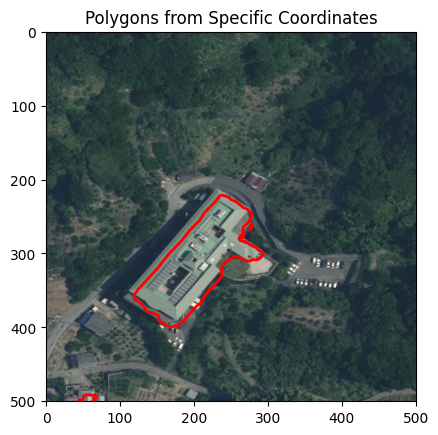

621


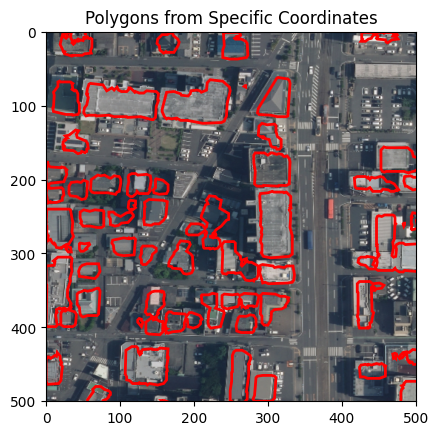

320


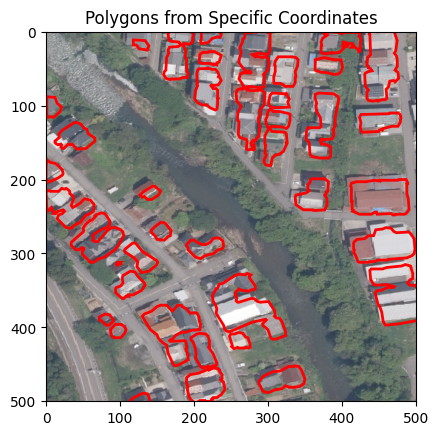

505


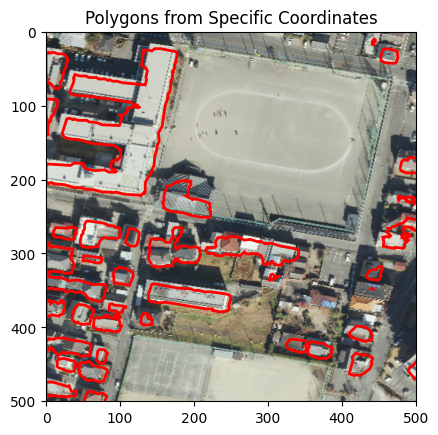

608


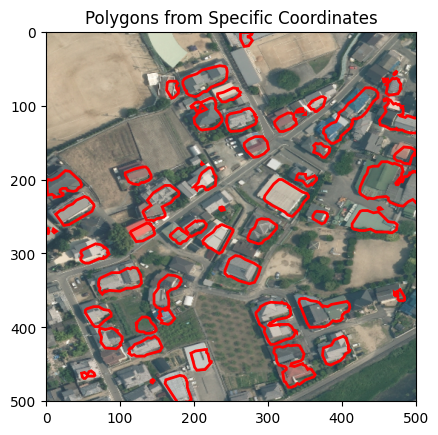

316


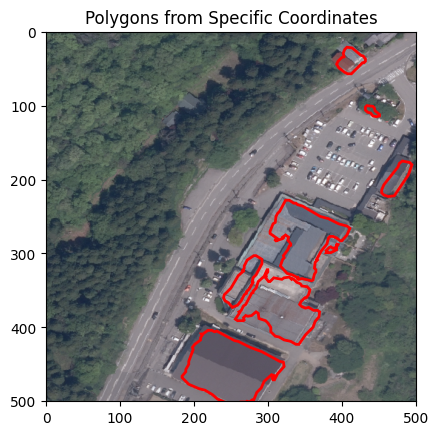

379


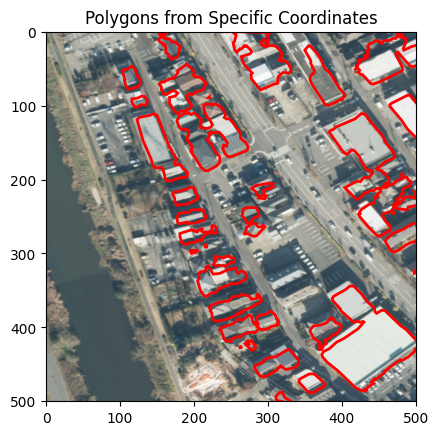

517


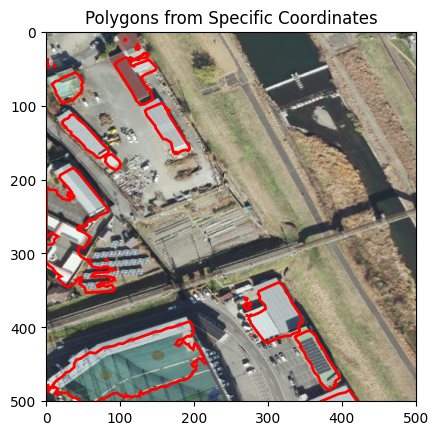

832


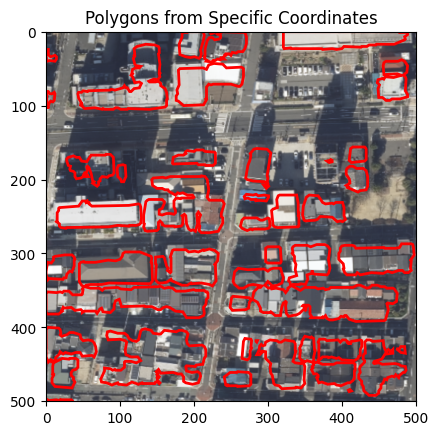

362


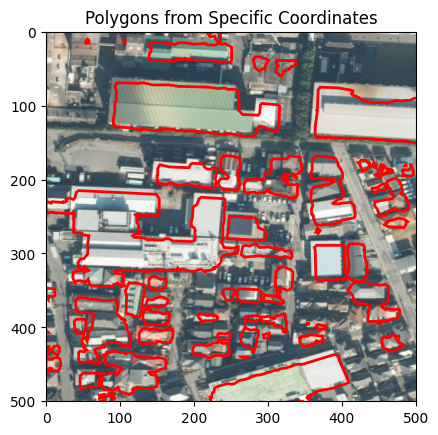

531


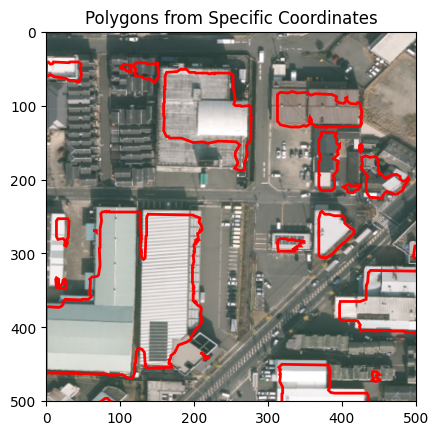

In [32]:
def plot(coordin, img):
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(img)
    
    # Plot each set of coordinates as a polygon
    for coordi in coordin:
        polygon = pltPolygon(coordi, closed=True, fill=None, edgecolor='red', linewidth=2)
        ax.add_patch(polygon)
    
    # Optionally, you can set the limits if you have a specific size to fit the polygons within
    ax.set_xlim(0, img.width)
    ax.set_ylim(0, img.height)
    
    # Invert y-axis to match typical image coordinates where (0,0) is at the top-left
    ax.invert_yaxis()
    
    # Set title and show plot
    ax.set_title("Polygons from Specific Coordinates")
    plt.show()

images = df['ImageID']
coordinates = df['Coordinates']

for step, (ids, coord) in enumerate(zip(images, coordinates)):
    print(ids)
    img = Image.open(f'./test/image/0{ids}.tif')
    coordi = ast.literal_eval(coord)
    plot(coordi, img)
    if step == 10:
        break